# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import numpy as np

from unityagents import UnityEnvironment
from dqn_brain_agent import BrainAgent, train_dqn
from training_analysis import plot_results

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Create Learning Agent and Examine Parameters

The simulation contains a single agent that navigates a large environment.  The agent is based on [ML-Agents's Brain class](https://github.com/Unity-Technologies/ml-agents/blob/master/ml-agents/mlagents/trainers/brain.py) and deep neural network defined in [PyTorch](https://pytorch.org/). 

The agent is instantiated as

At each time step, the agent has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [3]:
# create learning brain agent
brain_name = env.brain_names[0]
vanilla_agent = BrainAgent(brain_name, env.brains[brain_name])
ddqn_agent = BrainAgent(brain_name, env.brains[brain_name], ddqn=True)

# reset the environment
env_info = env.reset(train_mode=True)[vanilla_agent.name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
print('Number of actions:', vanilla_agent.brain.vector_action_space_size)

# examine the state space 
print('States look like:', env_info.vector_observations[0])
print('States have length:', vanilla_agent.brain.vector_observation_space_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Banana Navigation BrainAgent

The `dqn_brain_agent.py:train_dqn` trains a `BrainAgent` within a specified `env` using Deep Q-Learning.

In [4]:
# train brain agent with 'vanilla' deep q-learning
vanilla_scores = train_dqn(env, vanilla_agent, prefix='vanilla', stop_solved=False, n_episodes=1000)

Episode 100	Average Score: 0.99
Episode 200	Average Score: 4.88
Episode 300	Average Score: 8.13
Episode 400	Average Score: 11.81
Episode 437	Average Score: 13.04
Environment solved in 337 episodes!	Average Score: 13.04

Continuing training...
Episode 500	Average Score: 13.47
Episode 600	Average Score: 13.77
Episode 700	Average Score: 14.29
Episode 800	Average Score: 15.23
Episode 900	Average Score: 16.01
Episode 1000	Average Score: 15.73


In [5]:
# train brain agent with double deep q-learning
ddqn_scores = train_dqn(env, ddqn_agent, prefix='ddqn', stop_solved=False, n_episodes=1000)

Episode 100	Average Score: 0.94
Episode 200	Average Score: 3.99
Episode 300	Average Score: 7.41
Episode 400	Average Score: 10.55
Episode 499	Average Score: 13.03
Environment solved in 399 episodes!	Average Score: 13.03

Continuing training...
Episode 500	Average Score: 13.05
Episode 600	Average Score: 14.44
Episode 700	Average Score: 15.01
Episode 800	Average Score: 15.58
Episode 900	Average Score: 15.88
Episode 1000	Average Score: 15.89


Once trained, let's look at the learning curve

/home/ross/miniconda2/envs/public_drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ross/miniconda2/envs/public_drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


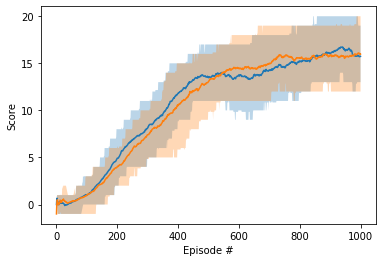

In [6]:
# plot the scores
plot_results([vanilla_scores, ddqn_scores])

When finished, you can close the environment.

In [7]:
env.close()